In [1]:
%matplotlib inline

import numpy as np
#from car_met_hast_STU import car_lik
import math
from numpy.linalg import inv
import matplotlib
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import laplace
from scipy.optimize import minimize
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


P(x,y) = n!/((n-x)!x!)*y**(x-a-1)*(1-y)**(n-x-b-1)
y in [0,1]
x in {0,1,2,...,n}
http://matplotlib.org/examples/mplot3d/hist3d_demo.html


In [2]:
def gibbs_sampling(b_step ,s_window ,n,alpha,beta, num_samples):
    s_binomial = 0
    s_beta = 0.1
    samples_x = []
    samples_y = []
    for i in range(0,num_samples):
        if i%2 == 0:
            s_binomial = np.random.binomial(n, s_beta, 1)[0]
            samples_x.append(s_binomial)
        elif i%2 == 1:
            s_beta = np.random.beta(s_binomial + alpha, n - s_binomial + beta,1)[0]
            samples_y.append(s_beta)

    #Burn in step
    
    samples_x = samples_x[b_step:]
    samples_y = samples_y[b_step:]

    return samples_x, samples_y

(array([ 0.14      ,  0.08      ,  0.07538462,  0.06461538,  0.07538462,
         0.05846154,  0.06461538,  0.06461538,  0.04461538,  0.05076923,
         0.05230769,  0.02769231,  0.04307692,  0.04461538,  0.04      ,
         0.03538462,  0.01076923,  0.01384615,  0.00923077,  0.00461538]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

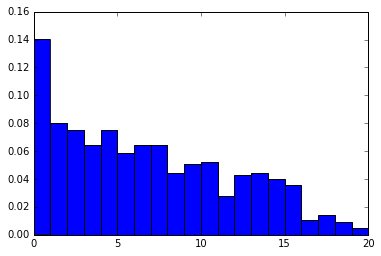

In [3]:
b_step = 100
s_window = 1
n = 20
alpha = 1
beta = 2
num_samples = 1500
samples_x, samples_y = gibbs_sampling(b_step,s_window,n,alpha,beta,num_samples)
plt.hist(samples_x,bins=np.arange(0,n+1,1), normed=True)

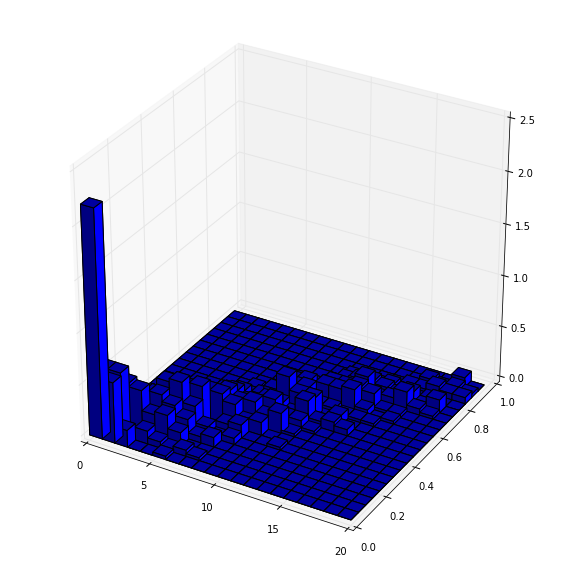

In [4]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
n_bins = 20
hist, xedges, yedges = np.histogram2d(samples_x, samples_y, bins=n_bins, normed = True)

elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] )

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (n / n_bins) * np.ones_like(zpos)
dy = (1/n_bins) *dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

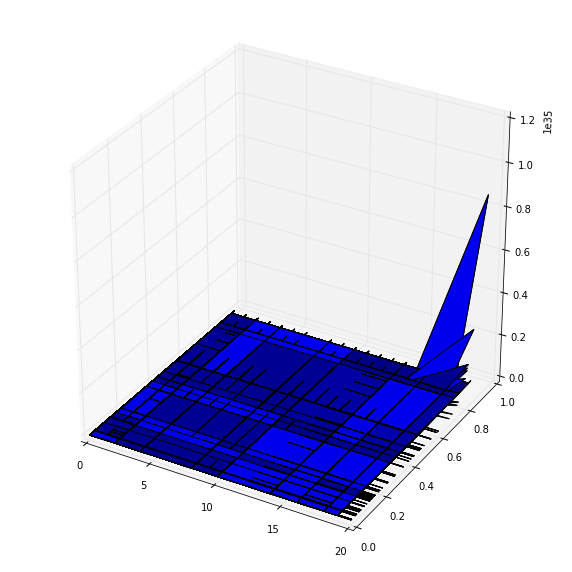

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import factorial

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
samples = []
for i in range(len(samples_x)):
    samples.append([samples_x[i], samples_y[i]])

X = np.asarray(samples_x)
Y = np.asarray(samples_y)
X, Y = np.meshgrid(samples_x, samples_y)
P = lambda X,Y: (factorial(n) / factorial(n-X)*factorial(X)) * (Y**(X + alpha -1))* (1-Y)**(n-X+beta-1)
surf = ax.plot_surface(X, Y, Z)

plt.show()